## Natural Language Processing

In [1]:
import nltk

In [3]:
# nltk.download_shell()

In [5]:
messages = [line.strip() for line in open('SMSSpamCollection')]

In [7]:
len(messages)

5574

In [8]:
import pandas as pd

In [10]:
messages = pd.read_csv('SMSSpamCollection', sep='\t', names=['label', 'message'])

In [11]:
messages

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [14]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [15]:
messages['length'] = messages['message'].apply(len)

In [16]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
%matplotlib inline

In [20]:
sns.set_style('darkgrid')

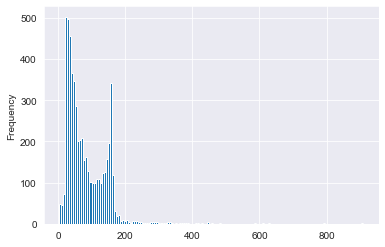

In [22]:
messages['length'].plot.hist(bins=150)

In [34]:
messages[messages['length']>900]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

In [35]:
import string

In [48]:
sample_msg = 'Sample Message! Notice: we have too many punctuations,,,'

In [49]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [55]:
filtered_msg = [char for char in sample_msg if char not in string.punctuation]

In [56]:
filtered_words = "".join(filtered_msg).split()

In [57]:
from nltk.corpus import stopwords

In [58]:
stopwords = stopwords.words('english')

In [63]:
cleaned_msg = [elem.lower() for elem in filtered_words if elem.lower() not in stopwords]

In [64]:
cleaned_msg

['sample', 'message', 'notice', 'many', 'punctuations']

In [74]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords]

In [75]:
from sklearn.feature_extraction.text import CountVectorizer

In [76]:
messages['message'].head()

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: message, dtype: object

In [77]:
bow_transform = CountVectorizer(analyzer=text_process).fit(messages['message'])

In [78]:
bow_transform

CountVectorizer(analyzer=<function text_process at 0x129549d90>, binary=False,
                decode_error='strict', dtype=<class 'numpy.int64'>,
                encoding='utf-8', input='content', lowercase=True, max_df=1.0,
                max_features=None, min_df=1, ngram_range=(1, 1),
                preprocessor=None, stop_words=None, strip_accents=None,
                token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None,
                vocabulary=None)

In [80]:
len(bow_transform.vocabulary_)

11425

In [81]:
message_4 = messages['message'][3]

In [82]:
message_4

'U dun say so early hor... U c already then say...'

In [84]:
bow_4 = bow_transform.transform([message_4])

In [86]:
bow_4.shape

(1, 11425)

In [87]:
print(bow_4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [90]:
print(bow_transform.get_feature_names()[4068])
print(bow_transform.get_feature_names()[9554])

U
say


In [91]:
message_bow = bow_transform.transform(messages['message'])

In [93]:
message_bow.shape

(5572, 11425)

In [94]:
message_bow.nnz

50548

In [97]:
sparsity = (100.0 * message_bow.nnz / (message_bow.shape[0] * message_bow.shape[1]))
print('sparsity: {}'.format(sparsity))

sparsity: 0.07940295412668218


In [100]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(message_bow)
tfidf4 = tfidf_transformer.transform(bow_4)
print(tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [102]:
print(tfidf_transformer.idf_[bow_transform.vocabulary_['u']])
print(tfidf_transformer.idf_[bow_transform.vocabulary_['university']])

3.2800524267409408
8.527076498901426


In [103]:
messages_tfidf = tfidf_transformer.transform(message_bow)

In [106]:
messages_tfidf.shape

(5572, 11425)

In [107]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(messages_tfidf, messages['label'])

In [108]:
spam_detect_model.predict(tfidf4)

array(['ham'], dtype='<U4')

In [109]:
spam_detect_model.predict(tfidf4)[0]

'ham'

In [110]:
messages['label'][3]

'ham'

In [111]:
from sklearn.model_selection import train_test_split


In [112]:
msg_train, msg_test, label_train, label_test = train_test_split(
messages['message'], messages['label'], test_size=0.3)

In [113]:
msg_train

1499    Time n Smile r the two crucial things in our l...
3099             This is all just creepy and crazy to me.
4023    U gd lor go shopping i got stuff to do. U wan ...
4841    PRIVATE! Your 2003 Account Statement for shows...
3120                             Stop knowing me so well!
                              ...                        
1341                              Might ax well im there.
5050    Edison has rightly said, "A fool can ask more ...
996       Change again... It's e one next to escalator...
4562    Good afternoon my boytoy. How goes that walkin...
4852    Gain the rights of a wife.dont demand it.i am ...
Name: message, Length: 3900, dtype: object

In [114]:
from sklearn.pipeline import Pipeline

In [115]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [116]:
pipeline.fit(msg_train,label_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x129549d90>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [117]:
predictions = pipeline.predict(msg_test)

In [119]:
from sklearn.metrics import classification_report, confusion_matrix

In [121]:
print(confusion_matrix(predictions,label_test))
print(classification_report(predictions,label_test))

[[1471   54]
 [   0  147]]
              precision    recall  f1-score   support

         ham       1.00      0.96      0.98      1525
        spam       0.73      1.00      0.84       147

    accuracy                           0.97      1672
   macro avg       0.87      0.98      0.91      1672
weighted avg       0.98      0.97      0.97      1672



### NLP Project

In [1]:
import pandas as pd
import nltk

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [5]:
sns.set_style('darkgrid')

In [7]:
yelp_data = pd.read_csv('yelp.csv')

In [8]:
yelp_data

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,VY_tvNUCCXGXQeSvJl757Q,2012-07-28,Ubyfp2RSDYW0g7Mbr8N3iA,3,First visit...Had lunch here today - used my G...,review,_eqQoPtQ3e3UxLE4faT6ow,1,2,0
9996,EKzMHI1tip8rC1-ZAy64yg,2012-01-18,2XyIOQKbVFb6uXQdJ0RzlQ,4,Should be called house of deliciousness!\n\nI ...,review,ROru4uk5SaYc3rg8IU7SQw,0,0,0
9997,53YGfwmbW73JhFiemNeyzQ,2010-11-16,jyznYkIbpqVmlsZxSDSypA,4,I recently visited Olive and Ivy for business ...,review,gGbN1aKQHMgfQZkqlsuwzg,0,0,0
9998,9SKdOoDHcFoxK5ZtsgHJoA,2012-12-02,5UKq9WQE1qQbJ0DJbc-B6Q,2,My nephew just moved to Scottsdale recently so...,review,0lyVoNazXa20WzUyZPLaQQ,0,0,0


In [9]:
yelp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
business_id    10000 non-null object
date           10000 non-null object
review_id      10000 non-null object
stars          10000 non-null int64
text           10000 non-null object
type           10000 non-null object
user_id        10000 non-null object
cool           10000 non-null int64
useful         10000 non-null int64
funny          10000 non-null int64
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [10]:
yelp_data.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [39]:
yelp_data['stars'].value_counts()

4    3526
5    3337
3    1461
2     927
1     749
Name: stars, dtype: int64

In [40]:
yelp_data.shape

(10000, 11)

In [26]:
yelp_data['text length'] = yelp_data['text'].apply(len)

In [27]:
yelp_data['text length']

0        889
1       1345
2         76
3        419
4        469
        ... 
9995     668
9996     881
9997    1425
9998     880
9999     461
Name: text length, Length: 10000, dtype: int64

In [28]:
yelp_data.columns

Index(['business_id', 'date', 'review_id', 'stars', 'text', 'type', 'user_id',
       'cool', 'useful', 'funny', 'text length'],
      dtype='object')

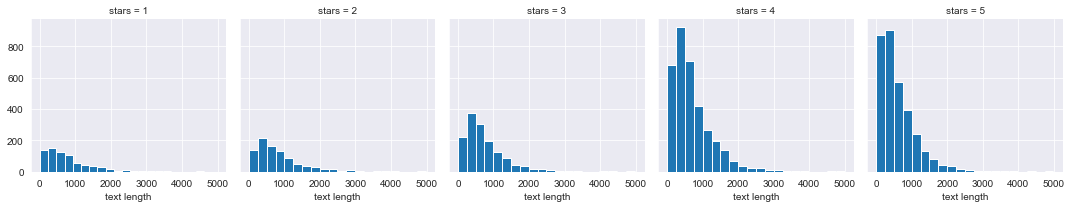

In [36]:
g = sns.FacetGrid(yelp_data, col='stars')
g.map(plt.hist, 'text length', bins=20)

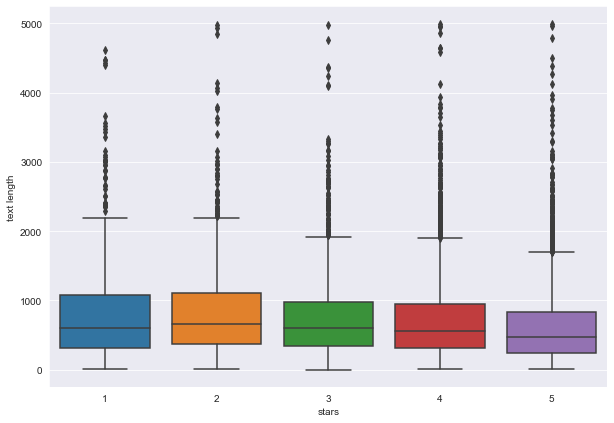

In [42]:
plt.figure(figsize=(10,7))
sns.boxplot(x='stars', y='text length',data=yelp_data)

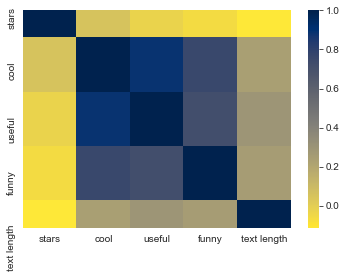

In [45]:
sns.heatmap(yelp_data.corr(), cmap='cividis_r')

In [46]:
yelp_data.corr()

,stars,cool,useful,funny,text length
stars,1.000000,0.052555,-0.023479,-0.061306,-0.114674
cool,0.052555,1.000000,0.887102,0.764342,0.241451
useful,-0.023479,0.887102,1.000000,0.723406,0.293975
funny,-0.061306,0.764342,0.723406,1.000000,0.251760
text length,-0.114674,0.241451,0.293975,0.251760,1.000000


In [52]:
yelp_filter = yelp_data[(yelp_data['stars']==1) | (yelp_data['stars']==5)]

In [53]:
yelp_filter.shape

(4086, 11)

In [54]:
X = yelp_filter['text']
y = yelp_filter['stars']

In [55]:
from sklearn.feature_extraction.text import CountVectorizer

In [56]:
cv = CountVectorizer()

In [58]:
X = cv.fit_transform(X)

In [60]:
from sklearn.model_selection import train_test_split

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [63]:
from sklearn.naive_bayes import MultinomialNB

In [64]:
nb = MultinomialNB()

In [65]:
nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [66]:
predictions = nb.predict(X_test)

In [67]:
from sklearn.metrics import confusion_matrix, classification_report

In [68]:
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           1       0.88      0.70      0.78       228
           5       0.93      0.98      0.96       998

    accuracy                           0.93      1226
   macro avg       0.91      0.84      0.87      1226
weighted avg       0.92      0.93      0.92      1226

[[159  69]
 [ 22 976]]


In [69]:
from sklearn.feature_extraction.text import TfidfTransformer

In [70]:
from sklearn.pipeline import Pipeline

In [73]:
pipeline = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [76]:
X = yelp_filter['text']
y = yelp_filter['stars']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [77]:
pipeline.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [78]:
predictions = pipeline.predict(X_test)

In [79]:
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       228
           5       0.81      1.00      0.90       998

    accuracy                           0.81      1226
   macro avg       0.41      0.50      0.45      1226
weighted avg       0.66      0.81      0.73      1226

[[  0 228]
 [  0 998]]


/Users/fu777kd/.pythonvenv/machine_learning/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
